# Credit Card Fraud Detection

## Problem Statement:

### Background
In the modern digital economy, credit card transactions are a critical component of daily commerce. However, with the increase in online and electronic transactions, the prevalence of fraudulent activities has also risen significantly. Credit card fraud poses substantial financial risks to both consumers and financial institutions. Effective detection of fraudulent transactions is essential to mitigate these risks and maintain trust in the financial system.

### Objective
The objective of this project is to develop a robust and accurate machine learning model capable of detecting fraudulent credit card transactions. The model should minimize both false positives (legitimate transactions flagged as fraudulent) and false negatives (fraudulent transactions missed by the model), thus ensuring a balance between security and user convenience.

### Problem Description
Given a dataset containing historical credit card transactions, each labeled as either fraudulent or legitimate, the task is to build a predictive model that can accurately classify future transactions. The model should be able to learn from the historical data and generalize well to new, unseen transactions.

### Dataset
The dataset consists of a large number of credit card transactions, each represented by various features. Common features include transaction amount, transaction date and time, merchant details, and other anonymized variables. Each transaction is labeled with a binary variable indicating whether it is fraudulent (1) or legitimate (0).

> Key characteristics of the dataset:

- High class imbalance: The number of fraudulent transactions is typically much smaller than the number of legitimate transactions.
- Anonymized features: For privacy and security reasons, many features may be anonymized and need careful analysis to extract meaningful patterns.

### Challenges
- Class Imbalance: The dataset is highly imbalanced, with fraudulent transactions being a small minority. This imbalance poses a challenge for training models that are not biased towards predicting the majority class.

- Feature Engineering: Given that many features are anonymized, it is crucial to perform effective feature engineering to extract relevant information and create meaningful input for the model.

- Real-time Detection: The model should be capable of making predictions in real-time or near real-time to be practical for actual deployment in a financial system.

- Cost of Errors: False positives can inconvenience customers and damage trust, while false negatives can result in financial loss. Therefore, balancing precision and recall is critical.

### Requirements
Data Preprocessing: Handle missing values, perform feature scaling, and deal with class imbalance using techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or undersampling.

- Model Selection: Evaluate various machine learning models, including but not limited to logistic regression, decision trees, random forests, gradient boosting, and neural networks.

- Evaluation Metrics: Use appropriate metrics such as Precision, Recall, F1-Score, ROC-AUC, and confusion matrix to evaluate model performance, with a particular focus on handling the imbalanced nature of the dataset.

### Deployment:
The final model should be deployable in a production environment, capable of making fast and accurate predictions.

### Ignore Warnings

In [ ]:
import warnings

warnings.filterwarnings('ignore')

### Importing Libraries for Data Importing and Visualizaion

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

### Import The Data and Study the data

In [ ]:
dataFr = pd.read_csv('./Data/creditCardData.csv', on_bad_lines='skip')

In [ ]:
dataFr.shape

(192217, 31)

In [ ]:
dataFr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
dataFr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192217 entries, 0 to 192216
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    192217 non-null  float64
 1   V1      192217 non-null  float64
 2   V2      192217 non-null  float64
 3   V3      192216 non-null  float64
 4   V4      192216 non-null  float64
 5   V5      192216 non-null  float64
 6   V6      192216 non-null  float64
 7   V7      192216 non-null  float64
 8   V8      192216 non-null  float64
 9   V9      192216 non-null  float64
 10  V10     192216 non-null  float64
 11  V11     192216 non-null  float64
 12  V12     192216 non-null  float64
 13  V13     192216 non-null  float64
 14  V14     192216 non-null  float64
 15  V15     192216 non-null  float64
 16  V16     192216 non-null  float64
 17  V17     192216 non-null  float64
 18  V18     192216 non-null  float64
 19  V19     192216 non-null  float64
 20  V20     192216 non-null  float64
 21  V21     19

In [ ]:
dataFr.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,192217.000000,192217.000000,192217.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,...,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000
mean,67625.357653,-0.123680,0.010869,0.373969,0.087454,-0.133446,0.050339,-0.060338,0.022256,0.008874,...,-0.018396,-0.059516,-0.017780,0.005508,0.070479,0.008411,0.001725,0.001972,89.239330,0.001935
std,32466.025900,1.884303,1.623238,1.429663,1.391825,1.355891,1.306161,1.213097,1.212177,1.138967,...,0.738323,0.684093,0.606235,0.602328,0.482985,0.489360,0.396697,0.312737,248.489472,0.043950
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,43474.000000,-0.968628,-0.571332,-0.247403,-0.778931,-0.798875,-0.704085,-0.580461,-0.175099,-0.663559,...,-0.228136,-0.540897,-0.168907,-0.339163,-0.227361,-0.331110,-0.066716,-0.038202,5.990000,0.000000
50%,65611.000000,-0.115844,0.087289,0.534977,0.089800,-0.188786,-0.213646,-0.017622,0.047272,-0.077373,...,-0.046609,-0.045773,-0.030924,0.054706,0.114247,-0.060110,0.006886,0.019316,22.780000,0.000000
75%,84600.000000,1.203573,0.787310,1.248104,0.904168,0.434474,0.445293,0.487700,0.342021,0.626476,...,0.144050,0.403931,0.110291,0.419838,0.388946,0.265311,0.089251,0.078126,79.000000,0.000000
max,128750.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
dataFr.isnull().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
# Converting object type to float64
object_cols = dataFr.select_dtypes(include=['object']).columns

dataFr[object_cols] = dataFr[object_cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
dataFr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192217 entries, 0 to 192216
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    192217 non-null  float64
 1   V1      192217 non-null  float64
 2   V2      192217 non-null  float64
 3   V3      192216 non-null  float64
 4   V4      192216 non-null  float64
 5   V5      192216 non-null  float64
 6   V6      192216 non-null  float64
 7   V7      192216 non-null  float64
 8   V8      192216 non-null  float64
 9   V9      192216 non-null  float64
 10  V10     192216 non-null  float64
 11  V11     192216 non-null  float64
 12  V12     192216 non-null  float64
 13  V13     192216 non-null  float64
 14  V14     192216 non-null  float64
 15  V15     192216 non-null  float64
 16  V16     192216 non-null  float64
 17  V17     192216 non-null  float64
 18  V18     192216 non-null  float64
 19  V19     192216 non-null  float64
 20  V20     192216 non-null  float64
 21  V21     19

In [ ]:
dataFr.isnull().sum().sum()

28

In [ ]:
# dropping the NaN Values
dataFr = dataFr.dropna()

In [ ]:
dataFr.isnull().sum().sum()

0

In [ ]:
dataFr.Class.value_counts()

Class
0.0    191844
1.0       372
Name: count, dtype: int64

In [ ]:
X = dataFr.drop(labels='Class', axis=1)

Y= dataFr['Class']

In [ ]:
print(f"The shape of X is   :   {X.shape}")
print(f"The shape of Y is   :   {Y.shape}")

The shape of X is   :   (192216, 30)
The shape of Y is   :   (192216,)


### Data Visualization

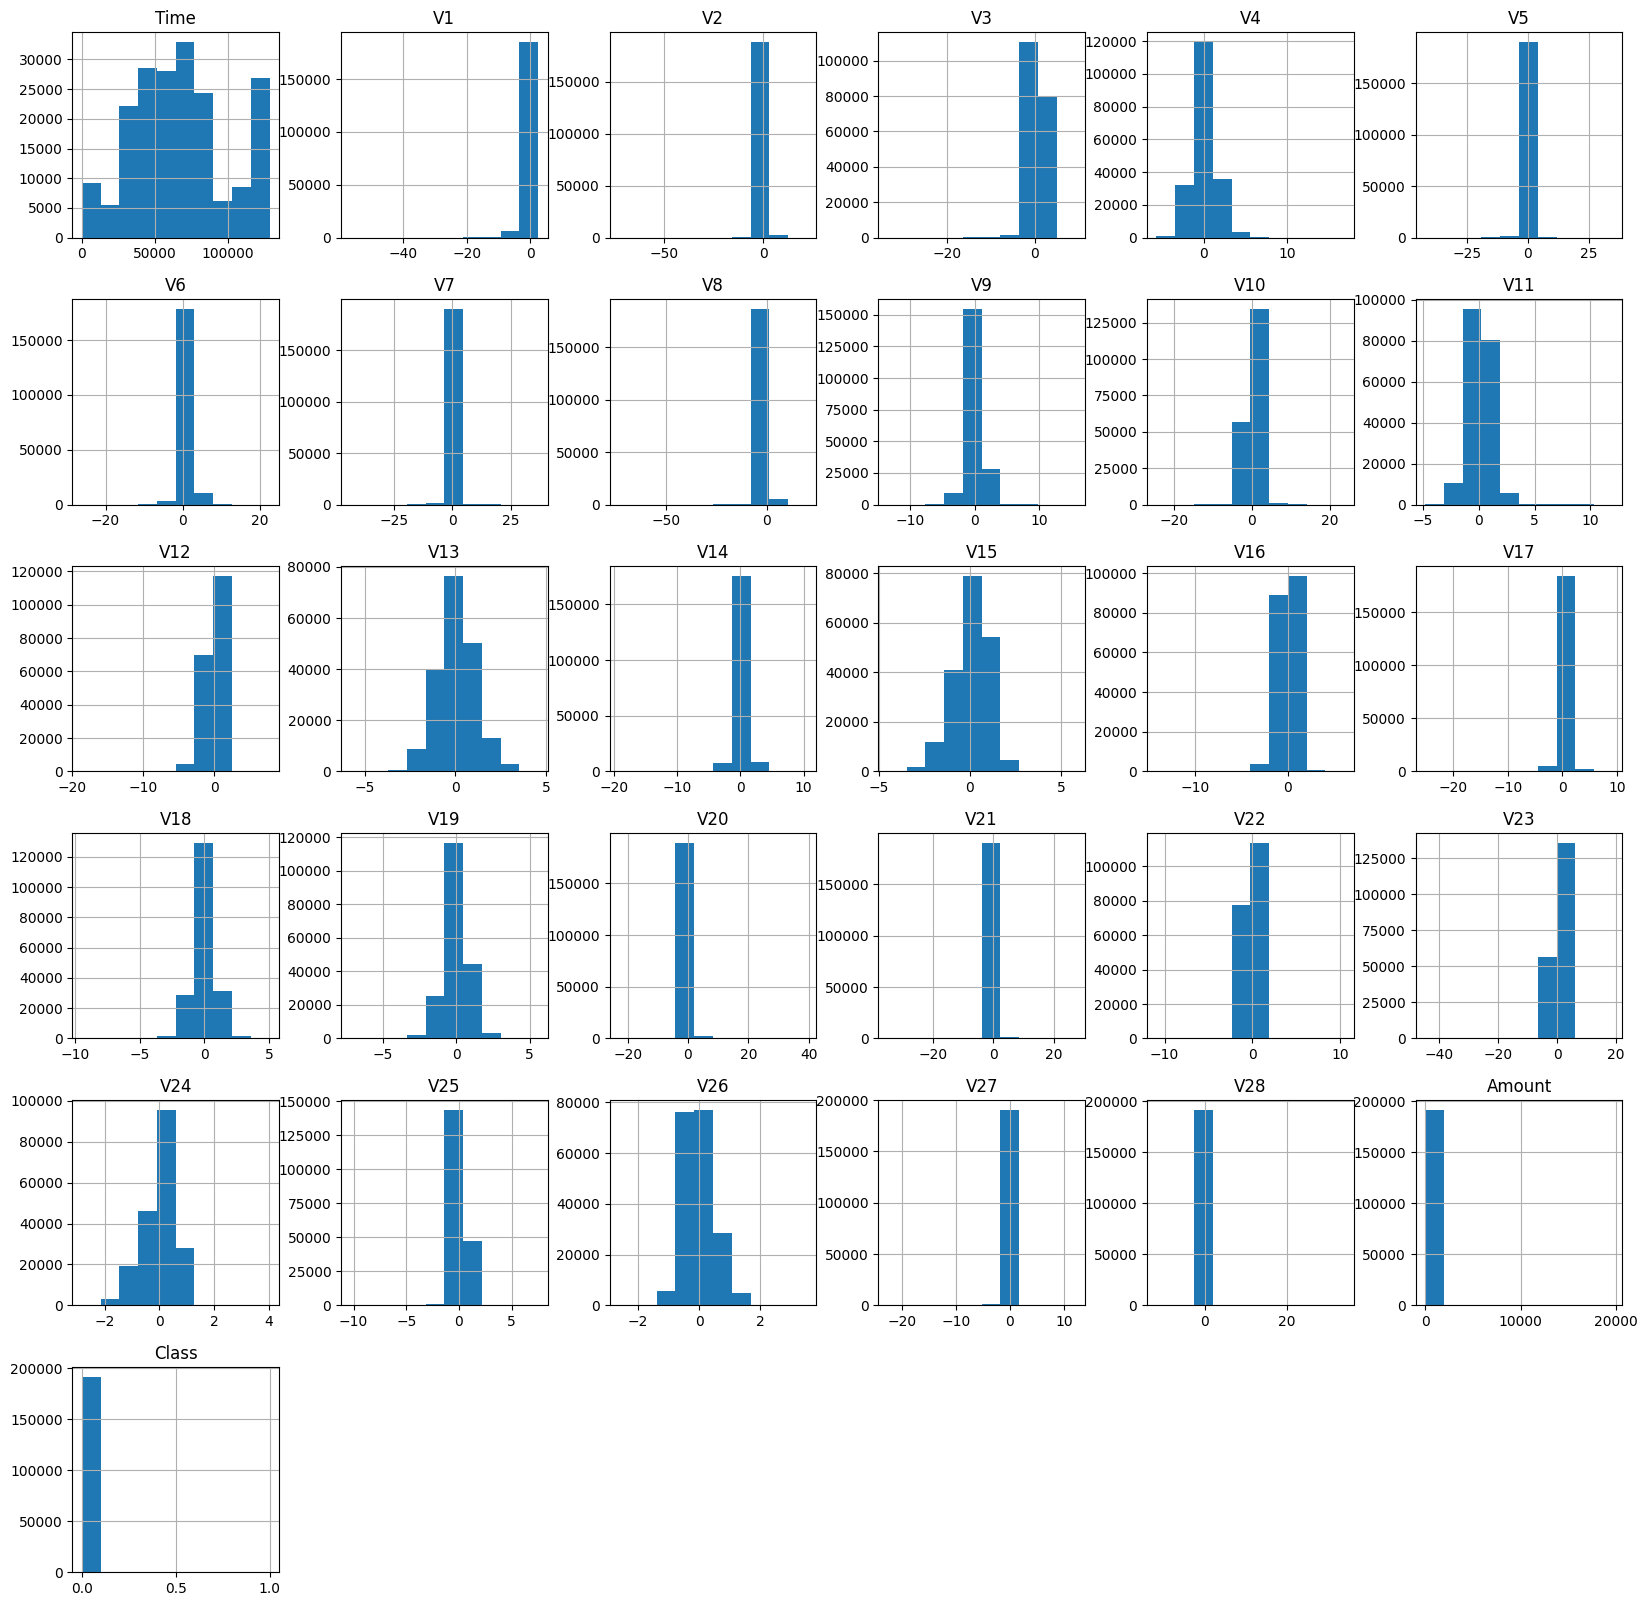

In [ ]:
dataFr.hist(figsize=(20,20))
plt.show()

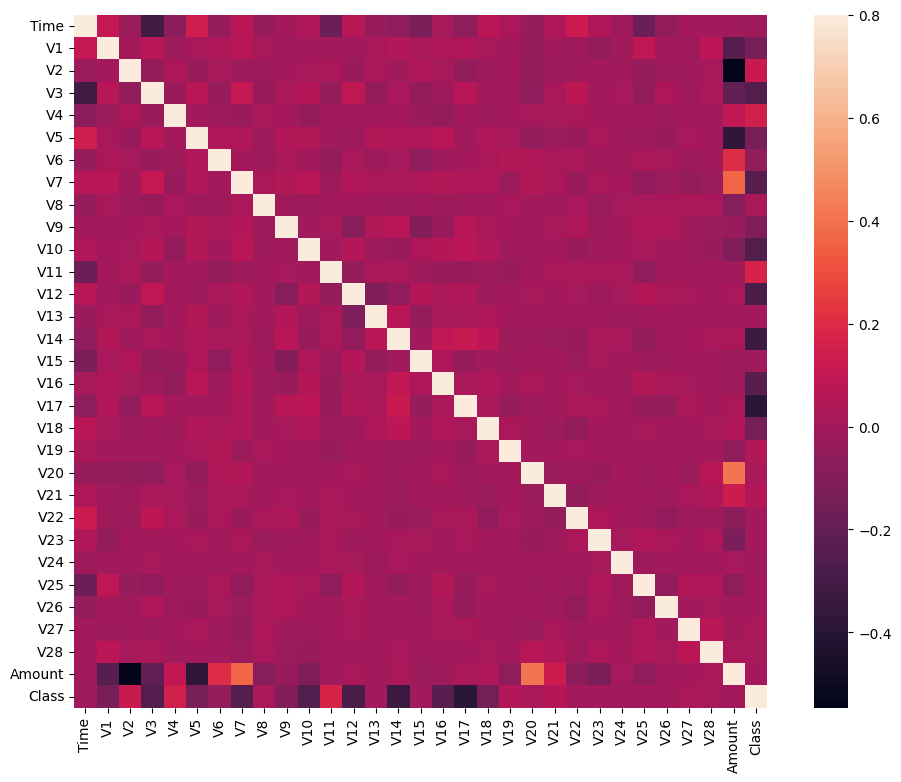

In [ ]:
corrmat = dataFr.corr()

fig = plt.figure(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)

plt.show()

### Feature Engineering

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
SS = StandardScaler()

X['normAmount'] = SS.fit_transform(X['Amount'].values.reshape(-1, 1))
X = X.drop(['Time', 'Amount'], axis=1)

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.242991
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.348303
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.164723
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.137876
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.077466


### Model Fitting

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

# DNN libraries[Keras]
import keras

from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Dropout


import pickle

In [ ]:
np.random.seed(10)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
print(f"The Shape of X_train  :  {X_train.shape}")
print(f"The Shape of X_test  :  {X_test.shape}")
print(f"The Shape of Y_train  :  {Y_train.shape}")
print(f"The Shape of Y_test  :  {Y_test.shape}")

The Shape of X_train  :  (153772, 29)
The Shape of X_test  :  (38444, 29)
The Shape of Y_train  :  (153772,)
The Shape of Y_test  :  (38444,)




>## *Function for model Fitting*



In [ ]:
def FitModel(X, Y, model_name, model_algo, gridParams, cv):
    """
      Fits a machine learning model using GridSearchCV and prints detailed results.

      Parameters:
      X (array-like): Feature data.
      Y (array-like): Target data.
      model_name (str): Name of the model.
      model_algo (estimator object): The machine learning algorithm to be used.
      gridParams (dict): Hyperparameters to be tuned.
      cv (int): Number of cross-validation folds.

      Returns:
      None
    """
    np.random.seed(10)

    print(f"\n{'='*60}")
    print(f"{'  INFO ':^60}")
    print(f"{'='*60}")
    print(f"Model Name  : {model_name}")
    print(f"Model Algo  : {model_algo}")
    print(f"Grid Params  : {gridParams}")
    print(f"CV  : {cv}")

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    print(f"\n{'='*60}")
    print(f"{'Training and Testing Data Split...':^60}")
    print(f"{'='*60}")
    print(f"{'Training data shape:':<30} {X_train.shape}")
    print(f"{'Testing data shape:':<30} {X_test.shape}")
    print(f"{'='*60}\n")

    # Setting up GridSearchCV
    print(f"{'='*60}")
    print(f"{f'Starting Grid Search for... {model_name}':^60}")
    print(f"{'='*60}\n")

    grid = GridSearchCV(
        estimator=model_algo,
        param_grid=gridParams,
        cv=cv,
        scoring='accuracy',
        verbose=2,
        n_jobs=-1
    )

    try:
        # Fitting the model
        grid_res = grid.fit(X_train, y_train)

        # Best parameters from grid search
        best_params = grid_res.best_params_
        print(f"\n{'='*60}")
        print(f"{'Best Parameters Found':^60}")
        print(f"{'='*60}")
        for param, value in best_params.items():
            print(f"{param:<30} {value}")
        print(f"{'='*60}\n")

        # Predictions and evaluations
        pred = grid_res.predict(X_test)
        cmat = confusion_matrix(y_test, pred)
        accuracy = accuracy_score(y_test, pred)
        class_report = classification_report(y_test, pred)

        # Printing results
        print(f"{'='*60}")
        print(f"{'Confusion Matrix':^60}")
        print(f"{'='*60}")
        print(cmat)
        print(f"\n{'='*60}")
        print(f"{'Accuracy':^60}")
        print(f"{'='*60}")
        print(f"{accuracy:.4f}")
        print(f"{'='*60}\n")
        print(f"{'Classification Report':^60}")
        print(f"{'='*60}")
        print(f"{class_report}")
        print(f"{'='*60}\n")
        print(f"Model fitting and evaluation completed for {model_name}.\n")

    except ValueError as e:
        print(f"\n{'='*60}")
        print(f"{'Error Encountered':^60}")
        print(f"{'='*60}")
        print(e)
        print(f"{'='*60}\n")


In [ ]:
_initial_models = []



>## *Nural Network*


In [ ]:
model = Sequential(
    [
        Dense(units=16, input_dim=29, activation='relu'),
        Dense(units=24, activation='relu'),
        Dropout(0.5), # To avoid Overfitting
        Dense(units=20, activation='relu'),
        Dense(units=24, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1917 (7.49 KB)
Trainable params: 1917 (7.4

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=15, epochs=5)

Epoch 1/5
10252/10252 [==============================] - 22s 2ms/step - loss: 0.0122 - accuracy: 0.9969
Epoch 2/5
10252/10252 [==============================] - 22s 2ms/step - loss: 0.0041 - accuracy: 0.9991
Epoch 3/5
10252/10252 [==============================] - 21s 2ms/step - loss: 0.0035 - accuracy: 0.9993
Epoch 4/5
10252/10252 [==============================] - 21s 2ms/step - loss: 0.0035 - accuracy: 0.9992
Epoch 5/5
10252/10252 [==============================] - 22s 2ms/step - loss: 0.0032 - accuracy: 0.9992


In [ ]:
test_acc = model.evaluate(X_test, Y_test)

print(f"The Test Accuracy : \n{test_acc}")

1202/1202 [==============================] - 2s 1ms/step - loss: 0.0057 - accuracy: 0.9993
The Test Accuracy : 
[0.005669703241437674, 0.9992976784706116]




> ## *Logistic Regression*



In [ ]:
# regurarization penalty space
penalty = ['l1', 'l2']

# regularization hyperparameter space
C = np.logspace(0, 4, 10)

# hyperparameter dictionary
hyperparameters = dict(C=C, penalty=penalty)

# Declearing the variables
model_name = 'Logistic Regression'
model_algo = LogisticRegression()
CV = 5

# Fitting to the model
FitModel(
    X,
    Y,
    model_name,
    model_algo,
    hyperparameters,
    CV
)


                            INFO                            
Model Name  : Logistic Regression
Model Algo  : LogisticRegression()
Grid Params  : {'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]), 'penalty': ['l1', 'l2']}
CV  : 5

             Training and Testing Data Split...             
Training data shape:           (153772, 29)
Testing data shape:            (38444, 29)

      Starting Grid Search for... Logistic Regression       

Fitting 5 folds for each of 20 candidates, totalling 100 fits

                   Best Parameters Found                    
C                              1.0
penalty                        l2

                      Confusion Matrix                      
[[38368    10]
 [   29    37]]

                          Accuracy                          
0.9990

                   Classification Report                    
   



> ## *XGBoost*



In [ ]:
params = {
    'n_estimators': [100, 500, 1000, 2000],
}

# Declearing the variables
model_name = 'XGBoost'
model_algo = XGBClassifier()
CV = 5

# Fitting the model
FitModel(X, Y, model_name, model_algo, params, CV)


                            INFO                            
Model Name  : XGBoost
Model Algo  : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Grid Params  : {'n_estimators': [100, 500, 1000, 2000]}
CV  : 5

             Training and Testing Data Split...             
Training data shap



> ## *Random Forest*



In [ ]:
# params = {
#     'n_estimators': [100, 500, 1000, 2000],
# }

# # Declearing the variables
# model_name = 'Random Forest'
# model_algo = RandomForestClassifier()
# CV = 5

# # Fitting the model
# FitModel(X, Y, model_name, model_algo, params, CV)



> ## *SVC[Support Vector Classifier]*



In [ ]:
# params = {
#     'C': [0.1, 1, 100, 1000],
#     'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
# }

# # Declearing the variables
# model_name = 'Support Vector Classifier'
# model_algo = SVC()
# CV = 5

# # Fitting the model
# FitModel(
#     X,
#     Y,
#     model_name,
#     model_algo,
#     params,
#     CV
#   )

**It's noticeable that there's a discrepancy between the Precision and Recall Scores. The models display a consistent bias towards the majority class. To address this issue, we propose rebalancing the data and retraining the models to assess potential changes.**

### Balancing The Dataset



- ## *Under Sampling*



In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
sm = NearMiss(version=2)

X_resampled, y_resampled = sm.fit_resample(X, Y)

In [ ]:
X_resampled.shape

(744, 29)

In [ ]:
X.shape

(192216, 29)

> - ## *Neural Network*

In [ ]:
model_US = Sequential(
    [
        Dense(units=16, input_dim=29, activation='relu'),
        Dense(units=24, activation='relu'),
        Dropout(0.5), # To avoid Overfitting
        Dense(units=20, activation='relu'),
        Dense(units=24, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]
)

In [ ]:
model_US.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                480       
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                500       
                                                                 
 dense_8 (Dense)             (None, 24)                504       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1917 (7.49 KB)
Trainable params: 1917 (7

In [ ]:
model_US.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_resampled, y_resampled, batch_size=15, epochs=5)

Epoch 1/5
50/50 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8871
Epoch 2/5
50/50 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9073
Epoch 3/5
50/50 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9194
Epoch 4/5
50/50 [==============================] - 0s 2ms/step - loss: 0.1631 - accuracy: 0.9274
Epoch 5/5
50/50 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.9274


In [ ]:
test_acc = model_US.evaluate(X_test, Y_test)

print(f"The Test Accuracy of Neural Network after Under Sampling : {test_acc}")

1202/1202 [==============================] - 2s 2ms/step - loss: 0.5788 - accuracy: 0.8692
The Test Accuracy of Neural Network after Under Sampling : [0.578762948513031, 0.8691863417625427]


> - ## *Logistic Regression*

In [ ]:
# regurarization penalty space
penalty = ['l1', 'l2']

# regularization hyperparameter space
C = np.logspace(0, 4, 10)

# hyperparameter dictionary
hyperparameters = dict(C=C, penalty=penalty)

# Declearing the variables
model_name = 'Logistic Regression'
model_algo = LogisticRegression()
CV = 5

# Fitting to the model
FitModel(
    X_resampled,
    y_resampled,
    model_name,
    model_algo,
    hyperparameters,
    CV
)


                            INFO                            
Model Name  : Logistic Regression
Model Algo  : LogisticRegression()
Grid Params  : {'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]), 'penalty': ['l1', 'l2']}
CV  : 5

             Training and Testing Data Split...             
Training data shape:           (595, 29)
Testing data shape:            (149, 29)

      Starting Grid Search for... Logistic Regression       

Fitting 5 folds for each of 20 candidates, totalling 100 fits

                   Best Parameters Found                    
C                              21.544346900318832
penalty                        l2

                      Confusion Matrix                      
[[65  5]
 [ 4 75]]

                          Accuracy                          
0.9396

                   Classification Report                    
     

> - ## *XGBoost*

In [ ]:
params = {
    'n_estimators': [100, 500, 1000, 2000],
}

# Declearing the variables
model_name = 'XGBoost'
model_algo = XGBClassifier()
CV = 5

# Fitting the model
FitModel(
    X_resampled,
    y_resampled,
    model_name,
    model_algo,
    params,
    CV
  )


                            INFO                            
Model Name  : XGBoost
Model Algo  : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Grid Params  : {'n_estimators': [100, 500, 1000, 2000]}
CV  : 5

             Training and Testing Data Split...             
Training data shap

> - ## *Random Forest*

In [ ]:
params = {
    'n_estimators': [100, 500, 1000, 2000],
}

# Declearing the variables
model_name = 'Random Forest'
model_algo = RandomForestClassifier()
CV = 5

# Fitting the model
FitModel(
    X_resampled,
    y_resampled,
    model_name,
    model_algo,
    params,
    CV
  )


                            INFO                            
Model Name  : Random Forest
Model Algo  : RandomForestClassifier()
Grid Params  : {'n_estimators': [100, 500, 1000, 2000]}
CV  : 5

             Training and Testing Data Split...             
Training data shape:           (595, 29)
Testing data shape:            (149, 29)

         Starting Grid Search for... Random Forest          

Fitting 5 folds for each of 4 candidates, totalling 20 fits

                   Best Parameters Found                    
n_estimators                   100

                      Confusion Matrix                      
[[70  0]
 [ 0 79]]

                          Accuracy                          
1.0000

                   Classification Report                    
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        70
         1.0       1.00      1.00      1.00        79

    accuracy                           1.00       149
   macro avg 

> - ## *SVC[Support Vector Classifier]*

In [ ]:
params = {
    'C': [0.1, 1, 100, 1000],
    'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
}

# Declearing the variables
model_name = 'Support Vector Classifier'
model_algo = SVC()
CV = 5

# Fitting the model
FitModel(
    X_resampled,
    y_resampled,
    model_name,
    model_algo,
    params,
    CV
  )


                            INFO                            
Model Name  : Support Vector Classifier
Model Algo  : SVC()
Grid Params  : {'C': [0.1, 1, 100, 1000], 'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]}
CV  : 5

             Training and Testing Data Split...             
Training data shape:           (595, 29)
Testing data shape:            (149, 29)

   Starting Grid Search for... Support Vector Classifier    

Fitting 5 folds for each of 28 candidates, totalling 140 fits

                   Best Parameters Found                    
C                              100
gamma                          0.005

                      Confusion Matrix                      
[[69  1]
 [ 0 79]]

                          Accuracy                          
0.9933

                   Classification Report                    
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        70
         1.0       0.99      1.00      0.99        79

  

- ## *Over Sampling*

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
SM = SMOTE(random_state=42)

X_resampled_OS, y_resampled_OS = SM.fit_resample(X, Y)

In [ ]:
X.shape

(192216, 29)

In [ ]:
X_resampled_OS.shape

(383688, 29)

> - ## *Neural Network*

In [ ]:
model_OS = Sequential(
    [
        Dense(units=16, input_dim=29, activation='relu'),
        Dense(units=24, activation='relu'),
        Dropout(0.5), # To avoid Overfitting
        Dense(units=20, activation='relu'),
        Dense(units=24, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]
)

In [ ]:
model_OS.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                480       
                                                                 
 dense_11 (Dense)            (None, 24)                408       
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                500       
                                                                 
 dense_13 (Dense)            (None, 24)                504       
                                                                 
 dense_14 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1917 (7.49 KB)
Trainable params: 1917 (7

In [ ]:
model_OS.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_resampled_OS, y_resampled_OS, batch_size=15, epochs=5)

Epoch 1/5
25580/25580 [==============================] - 55s 2ms/step - loss: 0.0166 - accuracy: 0.9953
Epoch 2/5
25580/25580 [==============================] - 66s 3ms/step - loss: 0.0072 - accuracy: 0.9983
Epoch 3/5
25580/25580 [==============================] - 55s 2ms/step - loss: 0.0061 - accuracy: 0.9987
Epoch 4/5
25580/25580 [==============================] - 55s 2ms/step - loss: 0.0054 - accuracy: 0.9989
Epoch 5/5
25580/25580 [==============================] - 54s 2ms/step - loss: 0.0052 - accuracy: 0.9990


In [ ]:
test_acc = model_OS.evaluate(X_test, Y_test)

print(f"The Test Accuracy of Neural Network after Under Sampling : {test_acc[1] * 100}")

1202/1202 [==============================] - 2s 1ms/step - loss: 0.8787 - accuracy: 0.0035
The Test Accuracy of Neural Network after Under Sampling : 0.351160136051476


> - ## *Logistic Regression*

In [ ]:
# regurarization penalty space
penalty = ['l1', 'l2']

# regularization hyperparameter space
C = np.logspace(0, 4, 10)

# hyperparameter dictionary
hyperparameters = dict(C=C, penalty=penalty)

# Declearing the variables
model_name = 'Logistic Regression'
model_algo = LogisticRegression()
CV = 5

# Fitting to the model
FitModel(
    X_resampled_OS,
    y_resampled_OS,
    model_name,
    model_algo,
    hyperparameters,
    CV
)


                            INFO                            
Model Name  : Logistic Regression
Model Algo  : LogisticRegression()
Grid Params  : {'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]), 'penalty': ['l1', 'l2']}
CV  : 5

             Training and Testing Data Split...             
Training data shape:           (306950, 29)
Testing data shape:            (76738, 29)

      Starting Grid Search for... Logistic Regression       

Fitting 5 folds for each of 20 candidates, totalling 100 fits

                   Best Parameters Found                    
C                              464.15888336127773
penalty                        l2

                      Confusion Matrix                      
[[37403   851]
 [ 2566 35918]]

                          Accuracy                          
0.9555

                   Classification Report         

> - ## *XGBoost*

In [ ]:
params = {
    'n_estimators': [100, 500, 1000, 2000],
}

# Declearing the variables
model_name = 'XGBoost'
model_algo = XGBClassifier()
CV = 5

# Fitting the model
FitModel(
    X_resampled_OS,
    y_resampled_OS,
    model_name,
    model_algo,
    params,
    CV
  )


                            INFO                            
Model Name  : XGBoost
Model Algo  : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Grid Params  : {'n_estimators': [100, 500, 1000, 2000]}
CV  : 5

             Training and Testing Data Split...             
Training data shap

> - ## *Random Forest*

In [ ]:
params = {
    'n_estimators': [100, 500, 1000, 2000],
}

# Declearing the variables
model_name = 'Random Forest'
model_algo = RandomForestClassifier()
CV = 5

# Fitting the model
FitModel(
    X_resampled_OS,
    y_resampled_OS,
    model_name,
    model_algo,
    params,
    CV
  )


                            INFO                            
Model Name  : Random Forest
Model Algo  : RandomForestClassifier()
Grid Params  : {'n_estimators': [100, 500, 1000, 2000]}
CV  : 5

             Training and Testing Data Split...             
Training data shape:           (306950, 29)
Testing data shape:            (76738, 29)

         Starting Grid Search for... Random Forest          

Fitting 5 folds for each of 4 candidates, totalling 20 fits


> - ## *SVC[Support Vector Classifier]*

In [ ]:
params = {
    'C': [0.1, 1, 100, 1000],
    'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
}

# Declearing the variables
model_name = 'Support Vector Classifier'
model_algo = SVC()
CV = 5

# Fitting the model
FitModel(
    X_resampled_OS,
    y_resampled_OS,
    model_name,
    model_algo,
    params,
    CV
  )

### Pickle Dump

In [ ]:
def dump_models_to_pickel(models):
  """
    Save multiple machine learning models to pickle files.

    Parameters:
    models (list of tuples): A list where each tuple contains a string (the model name) and the model instance.
  """
  for model_name, model in models:
    with open(f"{model_name}.pkl", "wb") as f:
      pickle.dump(model, f)
    print(f"{model_name} saved to {model_name}.pkl")